In [11]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Parámetros globales
P = 64                # Preámbulos disponibles
N = 30                # Número de UEs
TRIALS = 10000        # Número de ensayos para simulaciones

Este bloque prepara el entorno de trabajo importando las herramientas necesarias (numpy para cálculos y matplotlib para gráficos) y configurando las condiciones iniciales (P, N, TRIALS) bajo las cuales se realizarán las simulaciones en el resto del código.

In [12]:
def simular_colision(N, P, trials=TRIALS):
    """
    Simula la probabilidad de colisión usando el método Monte Carlo.
    
    Parámetros:
    - N : Número de UEs.
    - P : Preámbulos disponibles.
    - trials : Número de ensayos (por defecto 10,000).
    """
    colisiones = 0
    for _ in range(trials):
        preambulos = np.random.randint(0, P, N)
        if len(np.unique(preambulos)) < N:
            colisiones += 1
    return colisiones / trials

Este bloque de código define una función central llamada simular_colision. Su propósito es calcular la probabilidad de que ocurra una "colisión" (cuando varios usuarios intentan usar el mismo recurso) utilizando un método muy potente llamado Simulación Monte Carlo. Este método se basa en la repetición de un experimento aleatorio un gran número de veces para estimar una probabilidad.

In [14]:
def encontrar_N_50(P):
    """Encuentra el mínimo N para alcanzar 50% de probabilidad."""
    for N_prueba in range(1, 30):
        prob = simular_colision(N_prueba, P, trials=5000)
        if prob >= 0.5:
            return N_prueba
    return None

N_critico = encontrar_N_50(64)
print(f"2. N crítico para 50% de probabilidad: {N_critico}")

2. N crítico para 50% de probabilidad: 10


Este bloque de código define una función llamada encontrar_N_50 cuyo objetivo es determinar el número mínimo de UEs (N) necesario para que la probabilidad de colisión de preámbulos sea igual o superior al 50%. Además, se muestra cómo se utiliza esta función y se imprime el resultado.

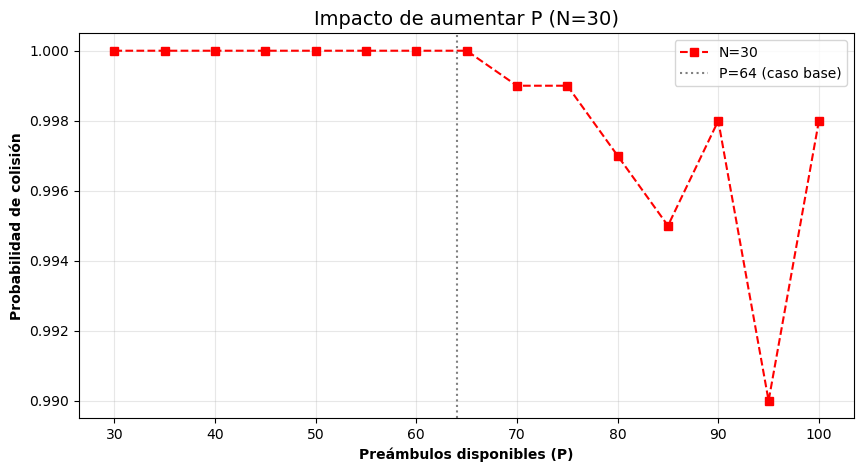

In [18]:
# Generar datos
Ps = np.arange(30, 101, 5)
probs_P = [simular_colision(30, p, 1000) for p in Ps]

# Configurar gráfico
plt.figure(figsize=(10, 5))
plt.plot(Ps, probs_P, 'rs--', markersize=6, label="N=30")
plt.xlabel("Preámbulos disponibles (P)", fontweight="bold")
plt.ylabel("Probabilidad de colisión", fontweight="bold")
plt.title("Impacto de aumentar P (N=30)", fontsize=14)
plt.axvline(x=64, color='gray', linestyle=':', label="P=64 (caso base)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

En este bloque de código realiza dos tareas fundamentales: primero, genera un conjunto de datos simulados para observar cómo cambia la probabilidad de colisión a medida que aumenta el número de UEs; y segundo, utiliza Matplotlib para crear un gráfico claro y legible que visualiza esta relación.

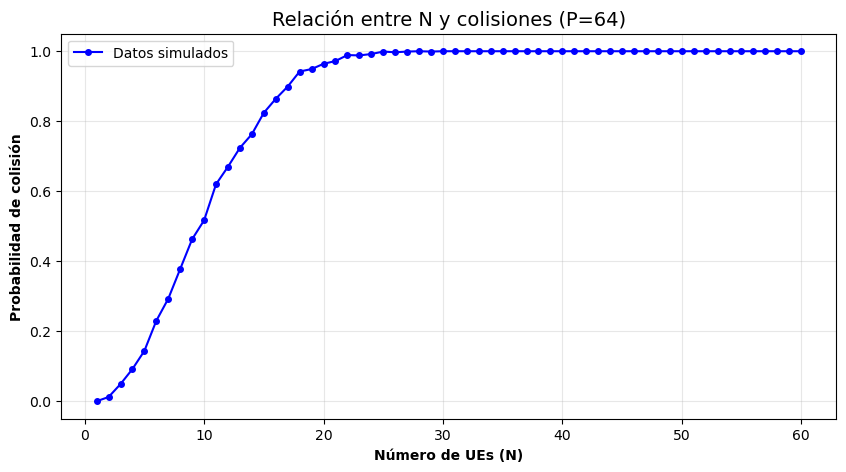

In [17]:
# Generar datos
Ns = np.arange(1, 61)
probs = [simular_colision(n, 64, 1000) for n in Ns]

# Configurar gráfico
plt.figure(figsize=(10, 5))
plt.plot(Ns, probs, 'bo-', markersize=4, label="Datos simulados")
plt.xlabel("Número de UEs (N)", fontweight="bold")
plt.ylabel("Probabilidad de colisión", fontweight="bold")
plt.title("Relación entre N y colisiones (P=64)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()